##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [2]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* **the purpose of your project**
This project aims to analyze voter registration trends in the United States, focusing on both national patterns and state-specific variations. By examining historical data, we can identify key factors influencing voter registration rates and how they have changed over time.

* **what the goal is**
The goal is to provide insights into voter registration trends to help policymakers, advocacy groups, and election officials improve voter outreach and engagement efforts. By understanding national trends and state-specific changes, stakeholders can develop more effective strategies to encourage voter participation.

* **why it is important for someone to read this notebook?**
This notebook will help readers understand how voter registration rates fluctuate based on demographic, political, and socioeconomic factors. It will also shed light on whether specific events, such as elections or policy changes, influence voter registration rates. Policymakers and organizations can use these insights to tailor voter engagement initiatives.


In additon, state your two research questions

* **Question 1:** How have new voter registration rates changed over time in the United States, and what factors correlate with these trends?

* **Question 2:** How have voter registration trends in New Jersey compared to national trends, and what role do state-specific policies or events play in these changes?



## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5
points)

In [3]:
print(voters.head(5))

  Jurisdiction  Year Month  New registered voters
0      Arizona  2016   Jan                  25852
1      Arizona  2016   Feb                  51155
2      Arizona  2016   Mar                  48614
3      Arizona  2016   Apr                  30668
4      Arizona  2020   Jan                  33229


The variable names are the state which the voters are registered, the month of registration, the year that registeration was recorded and the number of new registrations.


Check for any missing data data. (1 point)

In [4]:
voters.isnull().values.any()

False

Check your data types. (1 point)

Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [5]:
voters=voters.rename(columns={"Jurisdiction":"NAME"})

In [6]:
voters=voters.rename(columns={"New registered voters":"registered_voters"})

In [7]:
print(voters.head(5))

      NAME  Year Month  registered_voters
0  Arizona  2016   Jan              25852
1  Arizona  2016   Feb              51155
2  Arizona  2016   Mar              48614
3  Arizona  2016   Apr              30668
4  Arizona  2020   Jan              33229


I did this step as a check.

Explain any potential limitations to your data (2 points)

The dataset only covers 2 election cycles which limits the analysis of long term trends or recent shifts.

Each state collects voter registration data differently and there is a varying amount of people in each state a state could physically have a larger voting population but a lower percentage of registered voters.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [8]:
voters["registered_voters"].max()


238281

In [9]:
voters.loc[voters.registered_voters==voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


What is the average voter registration? (1 points)

In [10]:
voters["registered_voters"].mean()

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [11]:
high_voters=voters.loc[voters.registered_voters>48223.46226415094]

In [12]:
total_above_avg = high_voters.shape[0]
print("Total times above the national average:", total_above_avg)

Total times above the national average: 36


How many times did each state go above the national average for new voter registration? (2 points)`





In [13]:
state_counts = voters.groupby("NAME").size().reset_index(name="times_above_avg")
print(state_counts)

                    NAME  times_above_avg
0                Arizona                8
1             California                8
2               Colorado                8
3               Delaware                8
4   District of Columbia               10
5                Florida                8
6                Georgia                8
7               Illinois                8
8               Maryland               10
9         North Carolina               10
10                 Texas               10
11              Virginia               10


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [14]:
high_voters=voters.groupby("NAME")["registered_voters"].mean()
high_voters.sort_values(ascending=False)
print(high_voters.head(5))

NAME
Arizona                  35311.500
California              144545.375
Colorado                 20527.500
Delaware                  3166.375
District of Columbia      3248.400
Name: registered_voters, dtype: float64


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

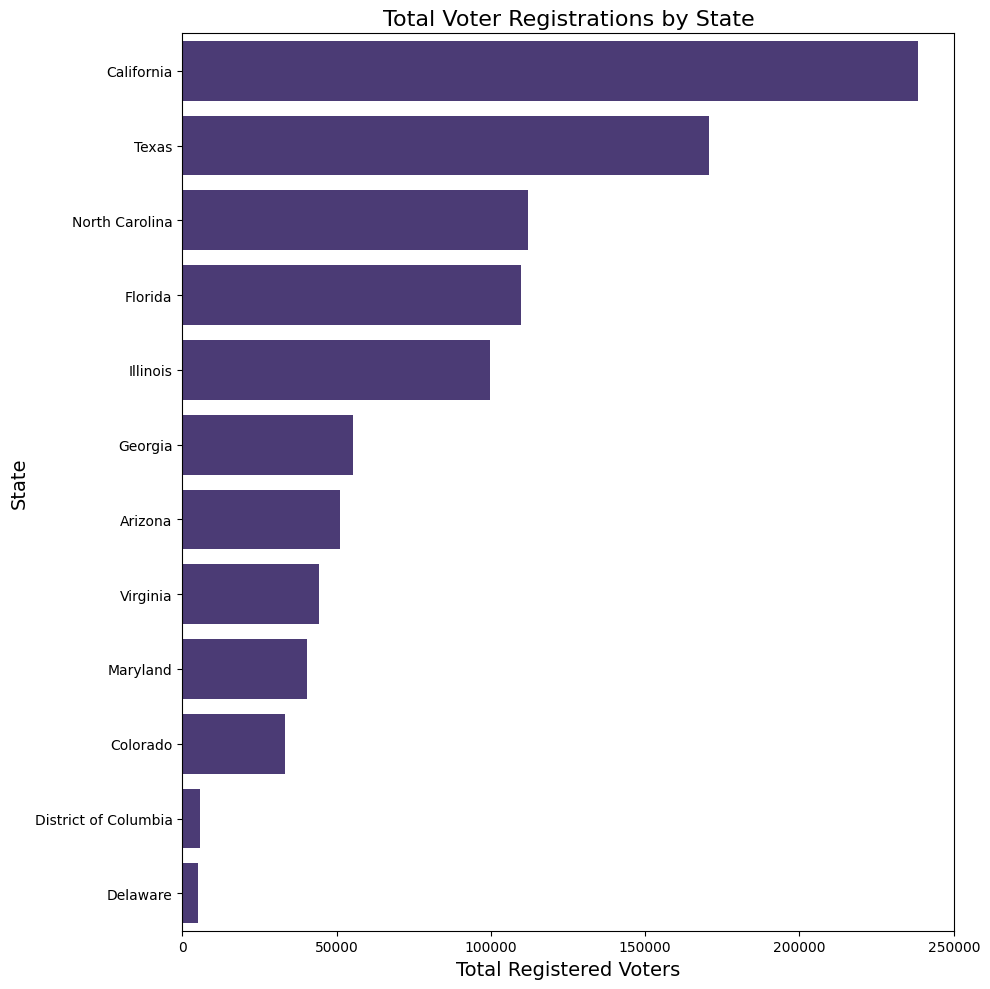

In [19]:
state_totals = voters.groupby('NAME')['registered_voters'].max().reset_index()
sns.set_palette("viridis")
plt.figure(figsize=(10,10))
ax = sns.barplot(data=state_totals, x='registered_voters', y='NAME',
order=state_totals.sort_values('registered_voters', ascending=False)['NAME'])

ax.set_title("Total Voter Registrations by State", fontsize=16)
ax.set_xlabel("Total Registered Voters", fontsize=14)
ax.set_ylabel("State", fontsize=14)

plt.tight_layout()
plt.show()


**Population Impact:**
States with larger populations (e.g., California, Texas, Florida) show significantly higher total voter registrations compared to smaller states.

**Skewed Distribution:**
The distribution is highly skewed, indicating that a few states account for a large proportion of registered voters, which may reflect differences in population size and state-specific registration policies.

**Implications for Policy:**
Understanding these trends can help tailor voter outreach and resource allocation to the needs of both densely and sparsely populated states.

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

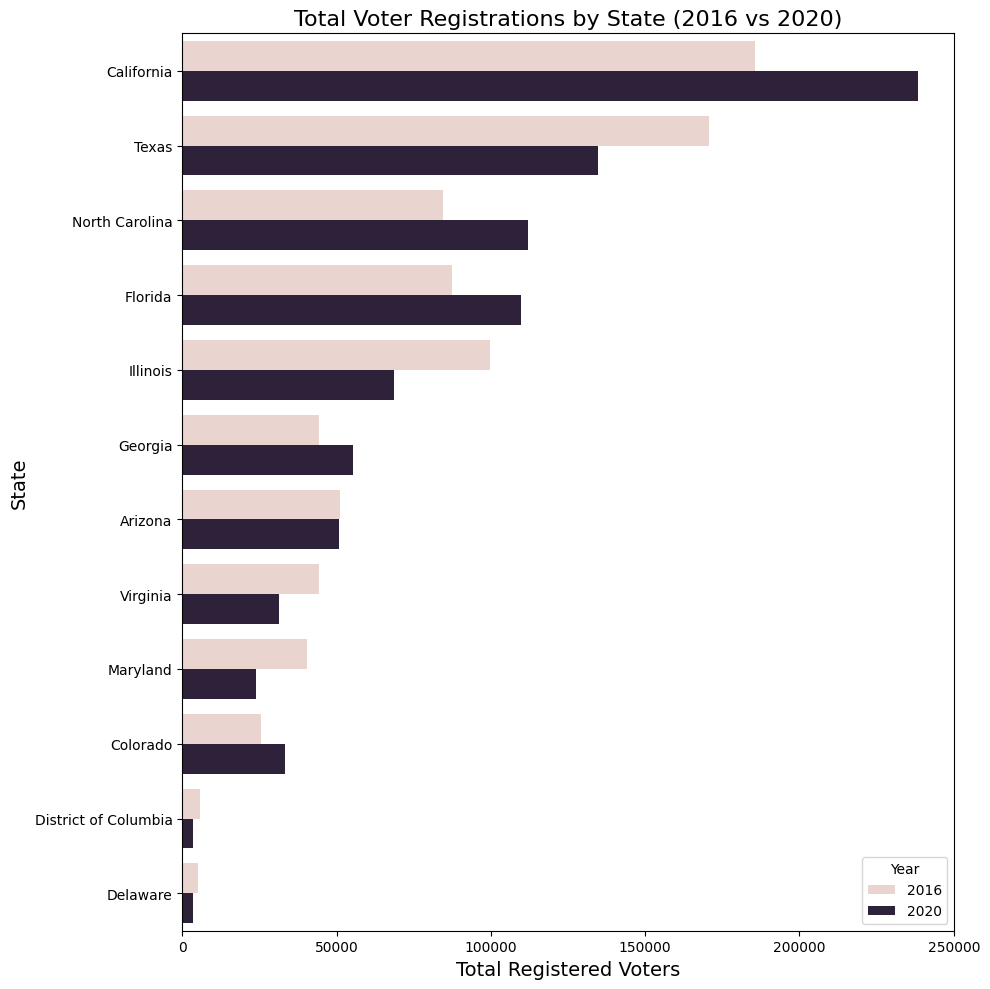

In [32]:
df = pd.DataFrame(voters)

# Group by state and year
state_totals = df.groupby(['NAME', 'Year'])['registered_voters'].max().reset_index()
sns.set_palette("magma")

# Create the bar plot
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=state_totals, x='registered_voters', y='NAME', hue='Year',
                 order=state_totals.sort_values('registered_voters', ascending=False)['NAME'])

ax.set_title("Total Voter Registrations by State (2016 vs 2020)", fontsize=16)
ax.set_xlabel("Total Registered Voters", fontsize=14)
ax.set_ylabel("State", fontsize=14)
plt.legend(title="Year")

plt.tight_layout()
plt.show()

**Monthly Variation:**
The plot shows how new voter registrations vary by month for both election cycles. Typically, there are spikes in certain months which may reflect intensified registration drives or deadlines prior to elections.

**Year-to-Year Differences:**
Comparing the facets for 2016 and 2020, you may notice differences in the magnitude of registration numbers. For example, 2020 might show higher registration numbers in specific months, possibly due to increased political engagement or changes in state policies.

**Implications:**
These trends are important for understanding when voter outreach efforts are most effective and can help inform future strategies for improving voter registration turnout.



Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

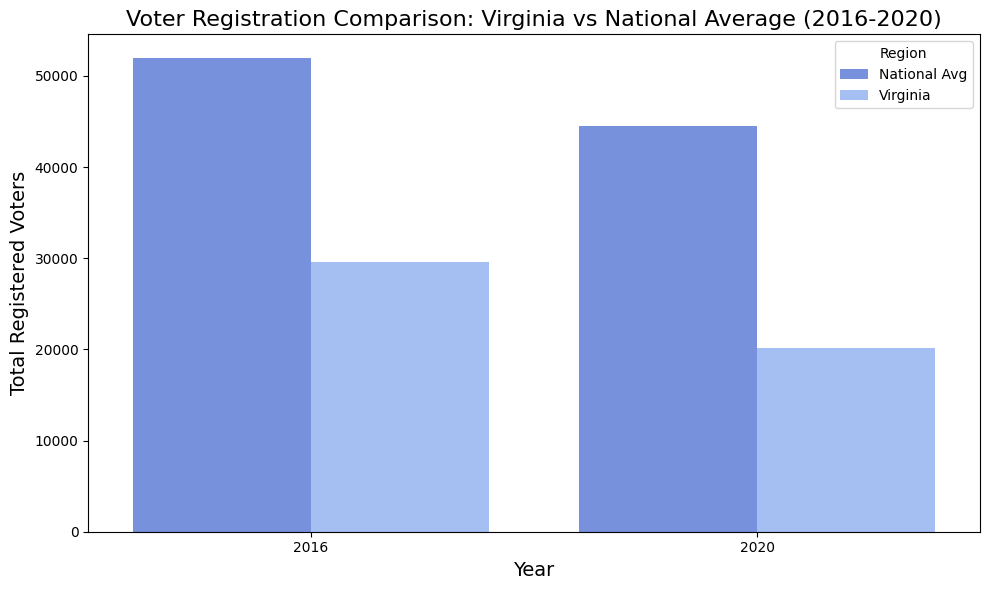

In [46]:
national_avg = df[df['NAME'] != "USA"].groupby('Year', as_index=False)['registered_voters'].mean()
national_avg['NAME'] = 'National Avg'  # Rename to avoid conflict

# Filter Virginia data
va_data = df[df['NAME'] == "Virginia"]

# Combine the data
comparison_df = pd.concat([national_avg, va_data], ignore_index=True)

# Set a visually appealing color palette
sns.set_palette("coolwarm")

# Create bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comparison_df, x='Year', y='registered_voters', hue='NAME', errorbar=None)

# Labels and title
ax.set_title("Voter Registration Comparison: Virginia vs National Average (2016-2020)", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Total Registered Voters", fontsize=14)
plt.legend(title="Region")

plt.tight_layout()
plt.show()

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [47]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)
states.head()

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 3.75 MiB/s, done.
Resolving deltas: 100% (13/13), done.


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


Set our continental US bounding box to us for the next questions. (2 points)

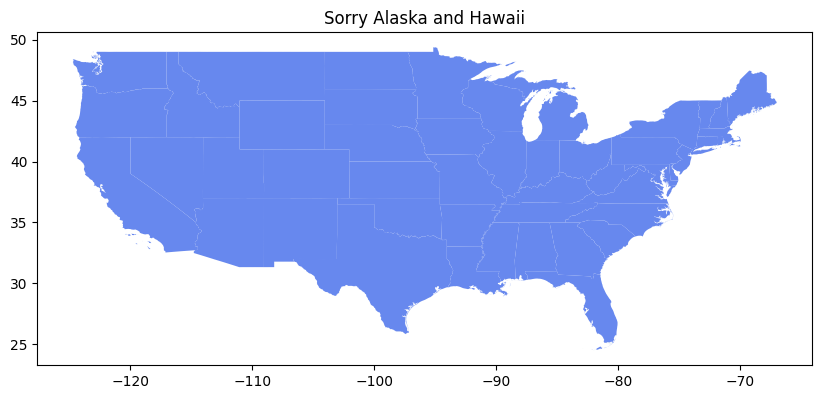

In [49]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
us = states.cx[minx:maxx, miny:maxy]

us.plot(figsize=(10, 10))
plt.title("Sorry Alaska and Hawaii")
plt.show()

Create a dataframe that shows the average voter registration per state. (2 points)

In [50]:
# Group by state and calculate the average registered voters
avg_voter_registration = df.groupby('NAME', as_index=False)['registered_voters'].mean()

# Rename column for clarity
avg_voter_registration.rename(columns={'registered_voters': 'avg_registered_voters'}, inplace=True)

# Display the first few rows
print(avg_voter_registration.head())


                   NAME  avg_registered_voters
0               Arizona              35311.500
1            California             144545.375
2              Colorado              20527.500
3              Delaware               3166.375
4  District of Columbia               3248.400


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)



In [54]:
merged_data = states.merge(avg_voter_registration, on="NAME", how="inner")

print(merged_data.head())

  STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      37  01027616  0400000US37    37     NC  North Carolina   00   
1      51  01779803  0400000US51    51     VA        Virginia   00   
2      12  00294478  0400000US12    12     FL         Florida   00   
3      48  01779801  0400000US48    48     TX           Texas   00   
4      06  01779778  0400000US06    06     CA      California   00   

          ALAND       AWATER  \
0  125923656064  13466071395   
1  102257717110   8528531774   
2  138949136250  31361101223   
3  676653171537  19006305260   
4  403503931312  20463871877   

                                            geometry  avg_registered_voters  
0  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...              56040.800  
1  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...              24845.200  
2  MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...              65868.125  
3  MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...             114610.10

Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

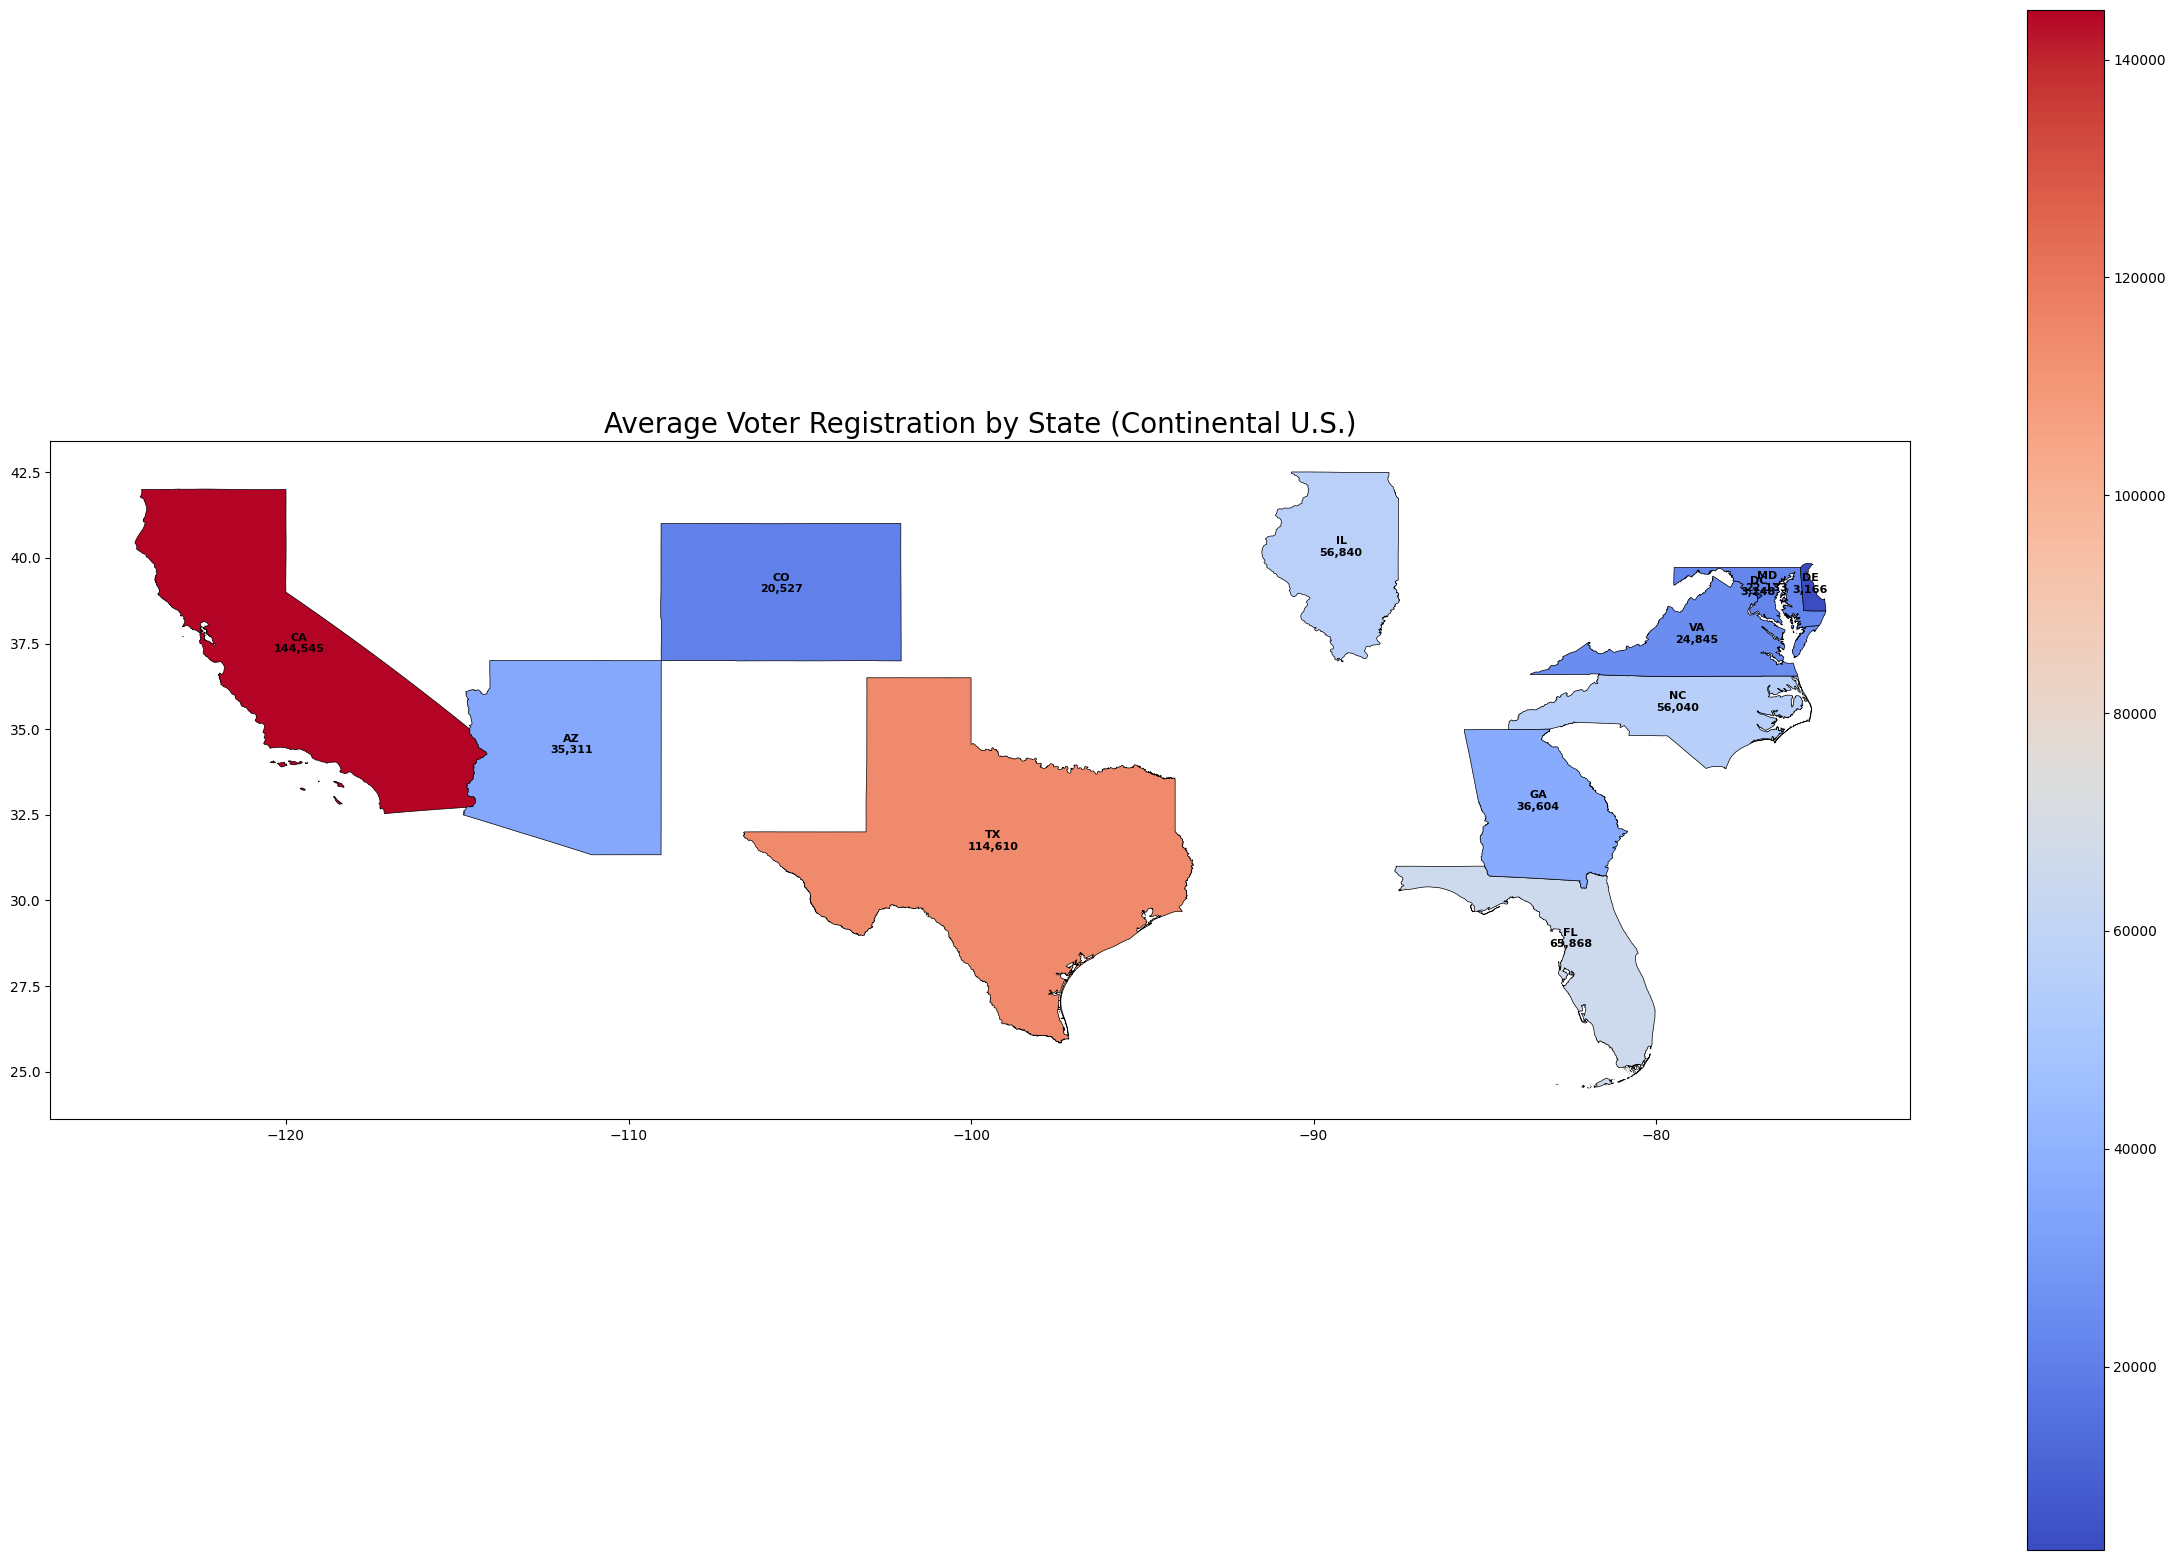

In [59]:
fig, ax = plt.subplots(figsize=(30, 20))

merged_data.plot(column="avg_registered_voters", cmap="coolwarm", linewidth=0.5, edgecolor="black", legend=True, ax=ax)

ax.set_title("Average Voter Registration by State (Continental U.S.)", fontsize=20)

for _, row in merged_data.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y,
             f"{row['STUSPS']}\n{int(row['avg_registered_voters']):,}",
             fontsize=8, ha="center", color="black", weight="bold")

# Show plot
plt.show()


##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


**Insights:**Voter registration trends fluctuate, peaking before major elections, highlighting the impact of political events and policies. Larger states like California and Texas consistently show higher registration numbers due to their population, while smaller states vary more. Virginia's average voting population is less then the national average however there are less people in Virginia.

**Suggestions:**Policymakers should focus on increasing voter outreach during historically low-registration months. Collaboration between national and state organizations can improve efficiency, and data-driven campaigns tailored to each state's trends can enhance voter engagement efforts.

**Next Steps:**Expanding the dataset to include more recent elections and demographic details would provide deeper insights. Additionally, developing predictive models could help forecast future registration trends, allowing for more proactive voter engagement strategies.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
print("Isha Gavas")

Isha Gavas
